- **Name - Aditya Jain**
- **Batch No - DS2310**
- **Assingment - Titanic survived Project**

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Load dataset...................
data=pd.read_csv("https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Titanic/titanic_train.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
print('No. Of Rows', data.shape[0])
print('No Of Columns', data.shape[1])

No. Of Rows 891
No Of Columns 12


In [4]:
#Let's sort columns by their Datatype
data.columns.to_series().groupby(data.dtypes).groups

{int64: ['PassengerId', 'Survived', 'Pclass', 'SibSp', 'Parch'], float64: ['Age', 'Fare'], object: ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']}

**Observation :**

- This titanic Dataset contains 891 rows & 12 columns.
- Here our objective is to predict survival using classification algorithm for that here our target variables is 'survived'
- We have 5 features with object datatypes & rest are with numerical features

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


**Data Integrity Check**

- Dataset can contain whitepaces, missing value, duplicates entries, let investigate intigrity of data before proceeding for future analysis.

In [6]:
data.duplicated().sum()

0

**Check Missing Value**

In [7]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

**Age, Cabin, Embarked have found null values**

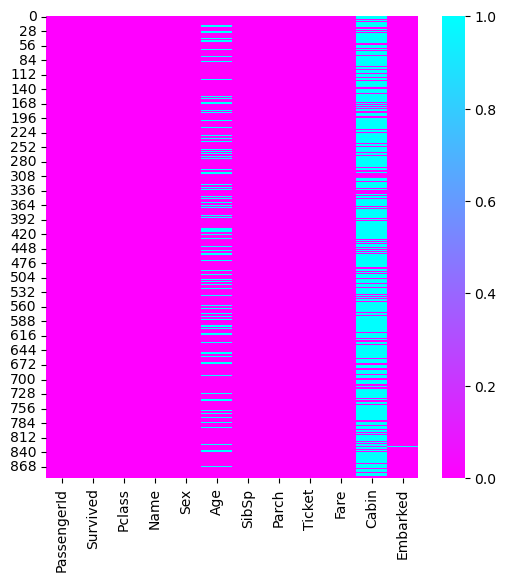

In [8]:
#Heatmap
plt.figure(figsize= (6,6))
sns.heatmap(data.isnull(), cmap = 'cool_r')
plt.show()

# Statistical Summary

In [9]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
data.describe(include= object)

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [11]:
data.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

- **"Survived" - Target/Label columns has categories/classes.**
- **"sex" - Feature column has 2 categories / classes.**
- **Pclass - Feature column has 2 categories / classes.**
- **Embarked - Feature column has 3 categories / classes.**
- **Sibsp - Feature column has 7 discrete value.**
- **Parch - Feature column has 7 discrete value.**

- **Cabin is unnecessary feature with missing value so we can drop column cabin.**

In [12]:
data.drop(columns=['Cabin'],inplace = True)

# Survived???

In [13]:
data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

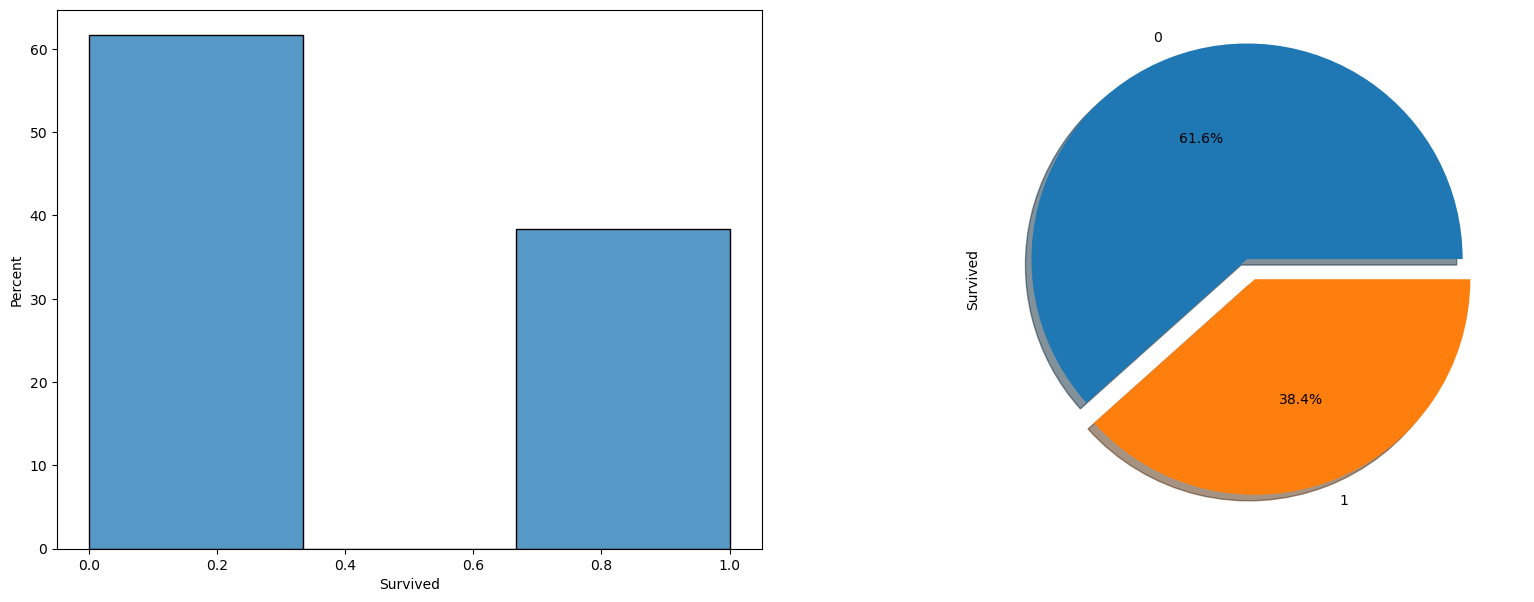

In [14]:
fig, ax = plt.subplots(1,2, figsize=(20,7))

sns.histplot(data=data, x="Survived", stat = "percent",bins=3, multiple='stack', ax=ax[0])
data["Survived"].value_counts().plot.pie(explode=[0.1,0], autopct="%1.1f%%", shadow=True, ax=ax[1])
plt.show()

**We observ from the above plot that only 38.4% of passenger survived the disaster while 61.6% were not survived**

**observation - it is evident that not many passenger survived the accident.**

# Investigate Gender Wise Survival Rate Of Passenger

In [15]:
data.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

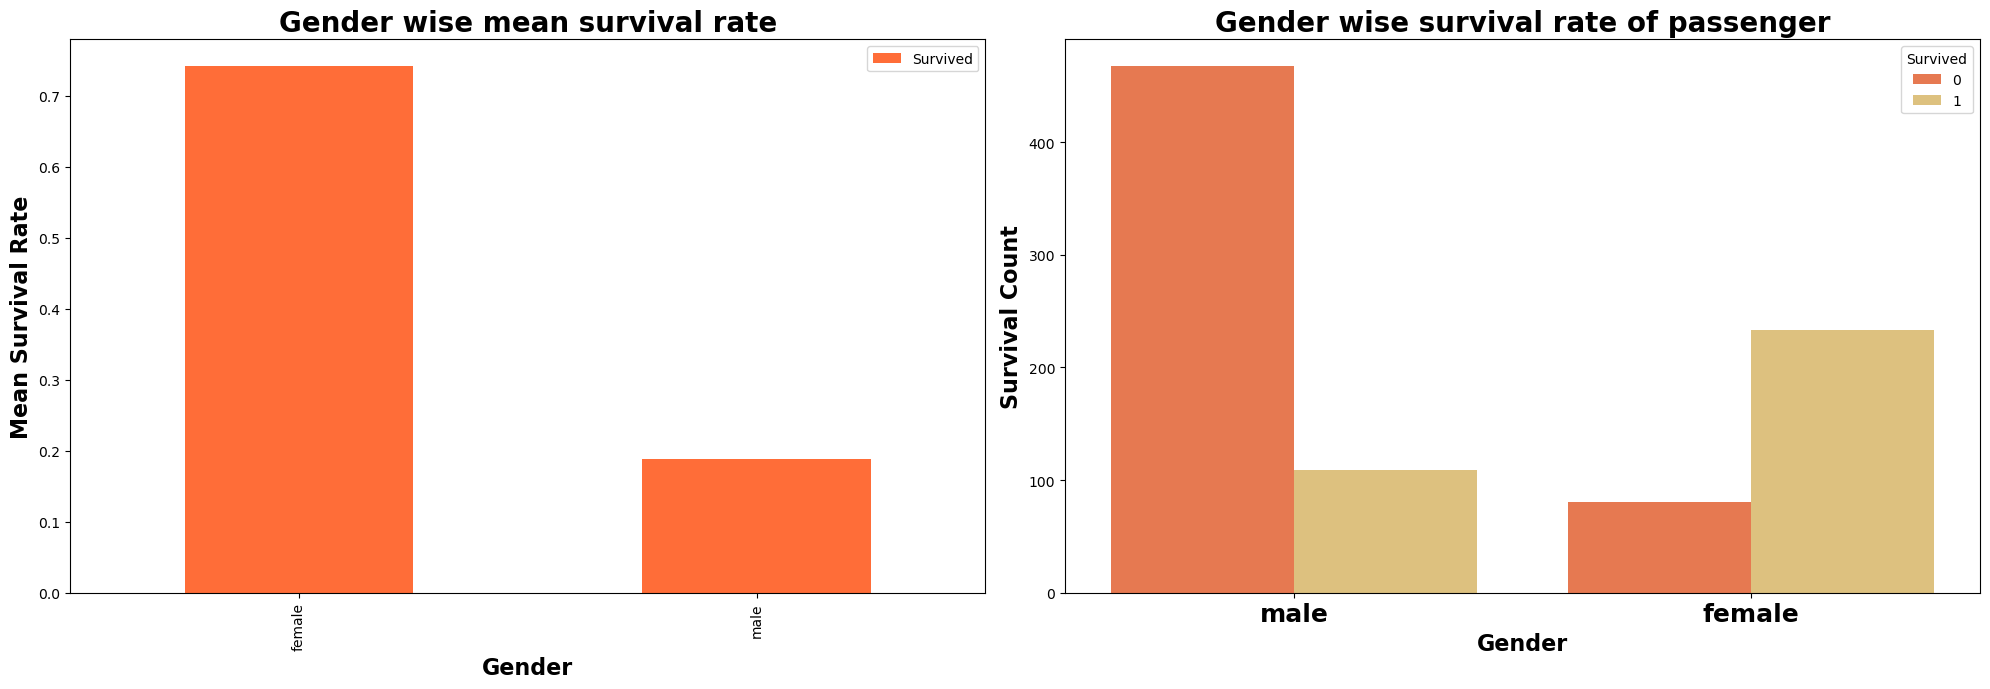

In [16]:
plt.rcParams["figure.autolayout"]= True
sns.set_palette('rainbow_r')
fig, ax = plt.subplots(1,2, figsize=(20,7))
data[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
plt.xticks(fontsize = 18, fontweight = 'heavy', rotation = 0)
ax[0].set_title('Gender wise mean survival rate', fontsize=20,fontweight='bold')
ax[0].set_xlabel('Gender', fontsize=16,fontweight='bold')
ax[0].set_ylabel('Mean Survival Rate', fontsize=16,fontweight='bold')
sns.countplot(x='Sex',hue='Survived', data=data, ax=ax[1])
ax[1].set_title('Gender wise survival rate of passenger', fontsize=20,fontweight='bold')
plt.xticks(fontsize = 18, fontweight = 'heavy')
ax[1].set_xlabel('Gender', fontsize=16,fontweight='bold')
ax[1].set_ylabel('Survival Count', fontsize=16,fontweight='bold')
plt.tight_layout()
plt.show()

**The number of men on the ship is lot more than the numbers of women.Still the number of women saved is almost twice the number of male saved. The survival rates for a woman on ship is around 75% while that for men in around 18-19%**

# Passenger Class V/S Survival

In [17]:
pd.crosstab(data.Pclass,data.Survived,margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


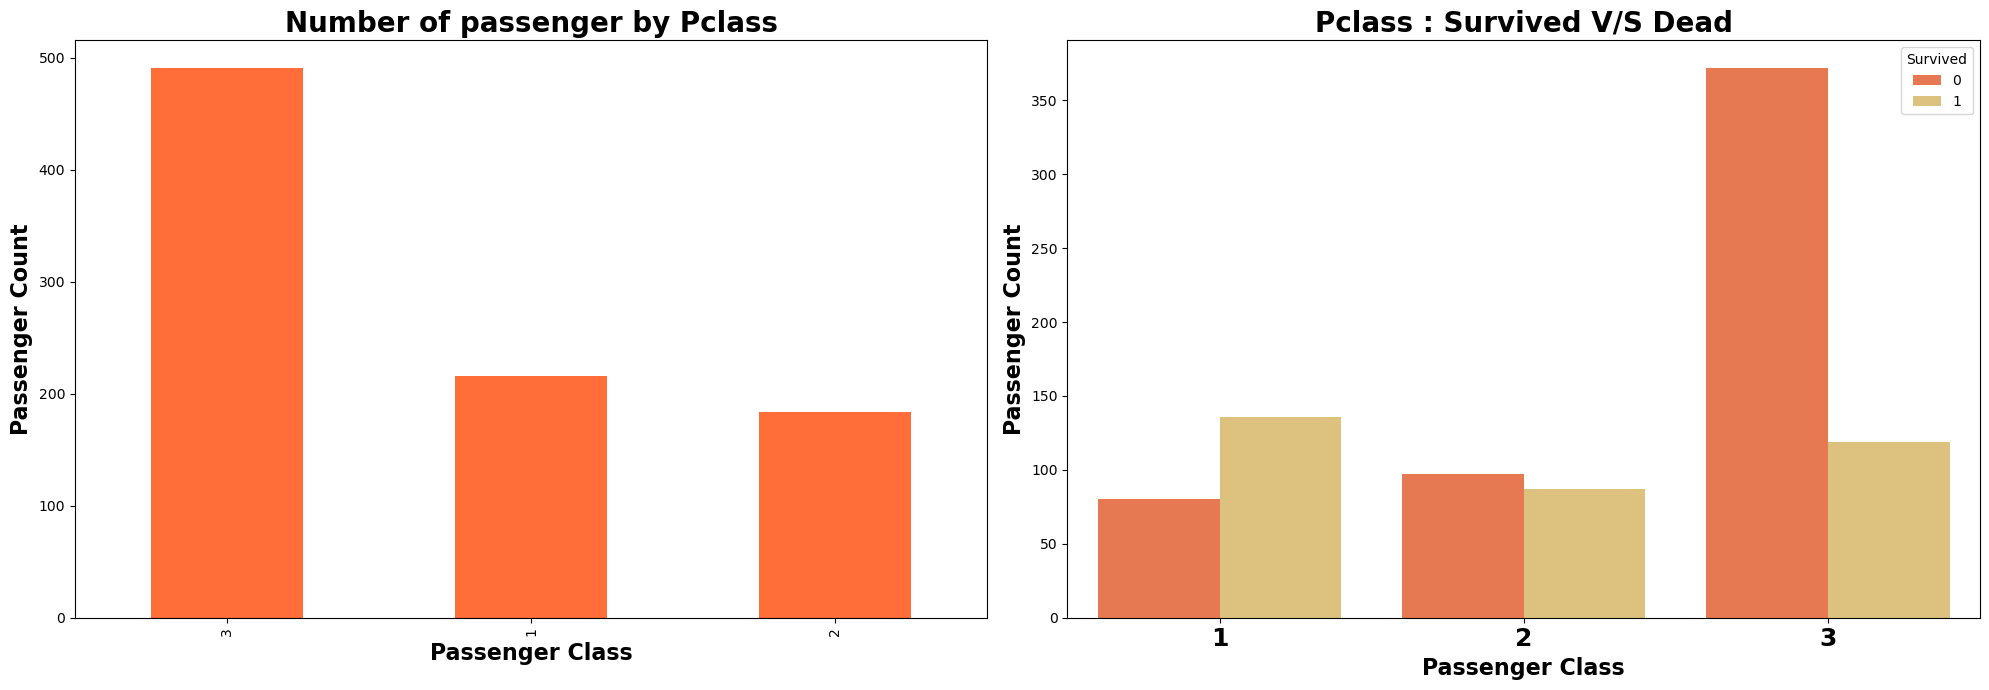

In [18]:
plt.rcParams["figure.autolayout"]= True
sns.set_palette('rainbow_r')
fig, ax = plt.subplots(1,2, figsize=(20,7))
data['Pclass'].value_counts().plot.bar(ax=ax[0])
plt.xticks(fontsize = 18, fontweight = 'heavy', rotation = 0)
ax[0].set_title('Number of passenger by Pclass', fontsize=20,fontweight='bold')
ax[0].set_xlabel('Passenger Class', fontsize=16,fontweight='bold')
ax[0].set_ylabel('Passenger Count', fontsize=16,fontweight='bold')
sns.countplot(x='Pclass',hue='Survived', data=data, ax=ax[1])
ax[1].set_title('Pclass : Survived V/S Dead', fontsize=20,fontweight='bold')
plt.xticks(fontsize = 18, fontweight = 'heavy')
ax[1].set_xlabel('Passenger Class', fontsize=16,fontweight='bold')
ax[1].set_ylabel('Passenger Count', fontsize=16,fontweight='bold')
plt.tight_layout()
plt.show()

**We can clearly see that passenger of Pclass 1 were given a very high prioritywhile rescue.Even thought the number of passengers in Pclass 3 were a log higher, still the number of survival from Pclass 3 is very low, around 25%.** 

# Let's Check Survival Rate With Sex And Pclass Together

In [19]:
pd.crosstab([data.Sex,data.Survived],data.Pclass,margins=True).style.background_gradient(cmap='summer_r')

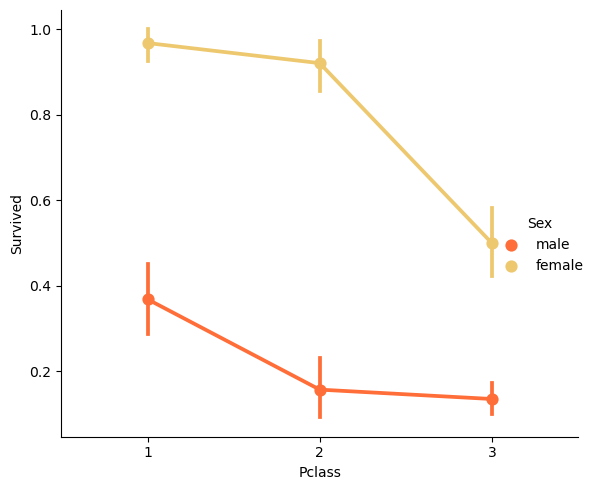

In [20]:
sns.catplot(x='Pclass',y='Survived',hue='Sex',data=data, kind = 'point')
plt.show()

**Observation-:**

- **Looking at the crosstab and the factorplot, we can easily infer that survival for women from Pclass 1 is about 95-96%, as only 3 out of 94 women from Pclass 1 died.**
- **It is evident (from crosstab and the catplot) that irrespect of Pclass, women were given first priority while rescue.Even men and Pclass1 have a very low survival rate.**


# Age

In [21]:
print('Oldest passenger was of',data['Age'].max(),'years')
print('Youngest passenger was of',data['Age'].min(),'years')
print('Average passenger was of',data['Age'].mean(),'years')

Oldest passenger was of 80.0 years
Youngest passenger was of 0.42 years
Average passenger was of 29.69911764705882 years


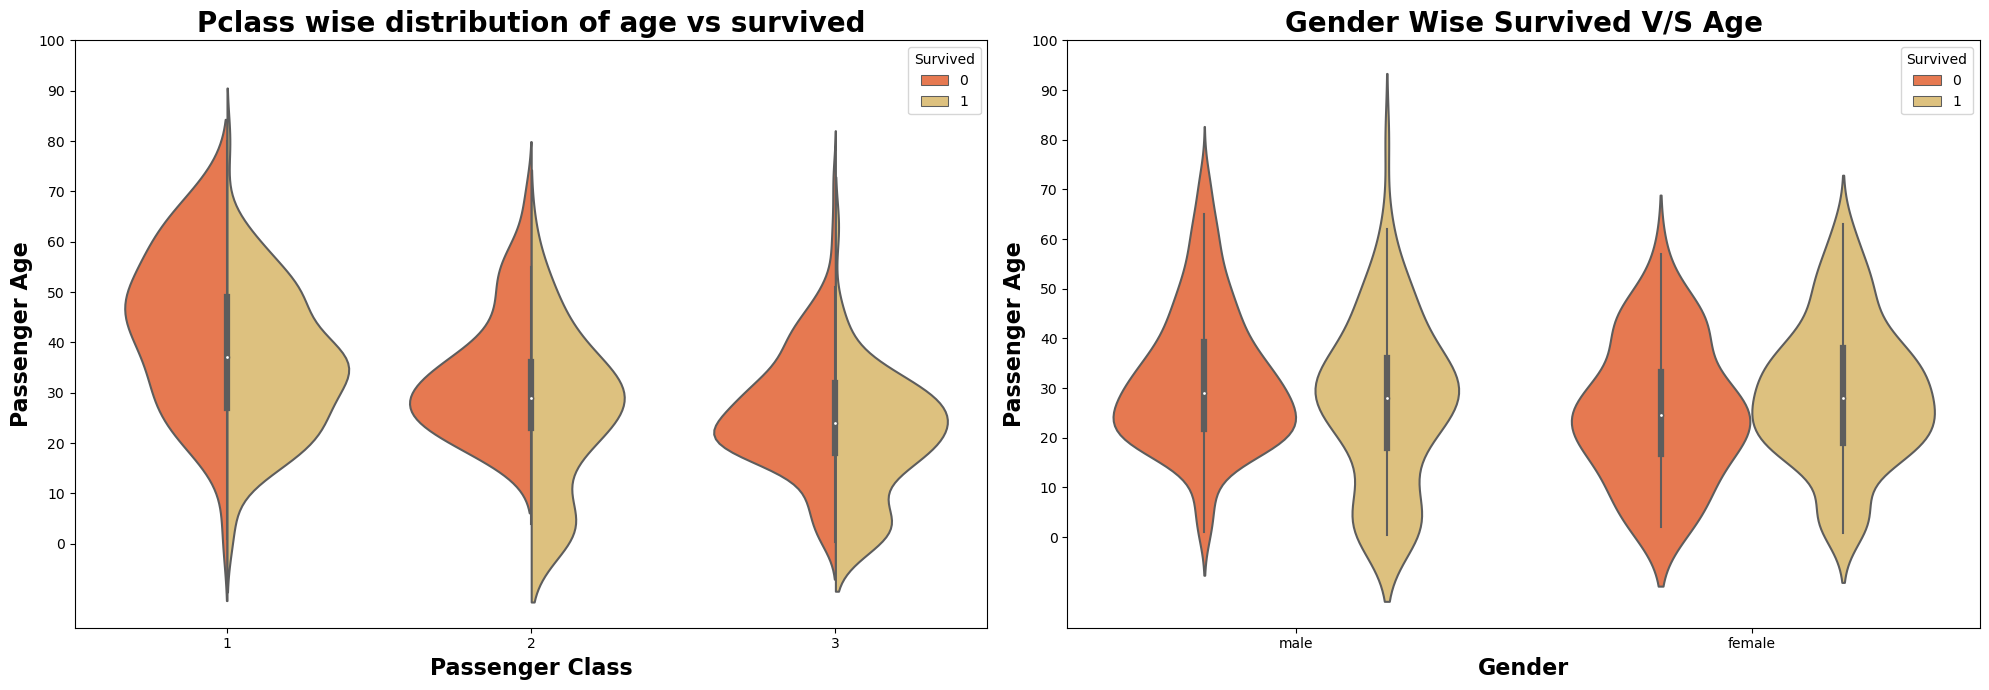

In [22]:
fig, ax = plt.subplots(1,2, figsize=(20,7))
sns.violinplot(x='Pclass',y='Age',hue='Survived', data = data,split=True,ax=ax[0])
ax[0].set_title('Pclass wise distribution of age vs survived', fontsize=20,fontweight='bold')
ax[0].set_yticks(range(0,110,10))
ax[0].set_xlabel('Passenger Class', fontsize=16,fontweight='bold')
ax[0].set_ylabel('Passenger Age', fontsize=16,fontweight='bold')
sns.violinplot(x='Sex',y='Age',hue='Survived', data=data, ax=ax[1])
ax[1].set_title('Gender Wise Survived V/S Age', fontsize=20,fontweight='bold')
ax[1].set_yticks(range(0,110,10))
ax[1].set_xlabel('Gender', fontsize=16,fontweight='bold')
ax[1].set_ylabel('Passenger Age', fontsize=16,fontweight='bold')
plt.tight_layout()
plt.show()

**Observation-:**
- **The number of childern increase with pclass and the survival rate for passenger below agr 10 looks to be good irrespect of the pclass.**
- **survival chances for passenger aged 20-50 from pclass 1 is high and even better for women.**
- **For males, the survival chance decrease with increase in age.**


# Now, handling missing values in age

**Age feature has 177 null values to replace these NaN values, we can assign them the mean age of dataset.**

**we cannot simply Assign Mean age of suppose of 29 years to 4 years old kid.So we must find another way to imputate mean age values.**

In [23]:
data['initial']=0
for i in data:
    data['initial']=data.Name.str.extract("([A-Za-z]+)\.")#Extract the solution with regex

In [24]:
pd.crosstab(data.initial,data.Sex).T.style.background_gradient(cmap='summer_r')

initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [25]:
data['initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],
                       ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

In [26]:
data.groupby('initial')['Age'].mean()

initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

# Filling NaN Ages

In [27]:
data.loc[(data.Age.isnull() & (data.initial)=='Mr'), 'Age'].fillna(32.73, inplace=True)

In [28]:
data.loc[(data.Age.isnull() & (data.initial)=='Mr'), 'Age']=32.73
data.loc[(data.Age.isnull() & (data.initial)=='Mrs'), 'Age']=35.98
data.loc[(data.Age.isnull() & (data.initial)=='Master'), 'Age']=4.57
data.loc[(data.Age.isnull() & (data.initial)=='Miss'), 'Age']=21.86
data.loc[(data.Age.isnull() & (data.initial)=='Other'), 'Age']=45.88

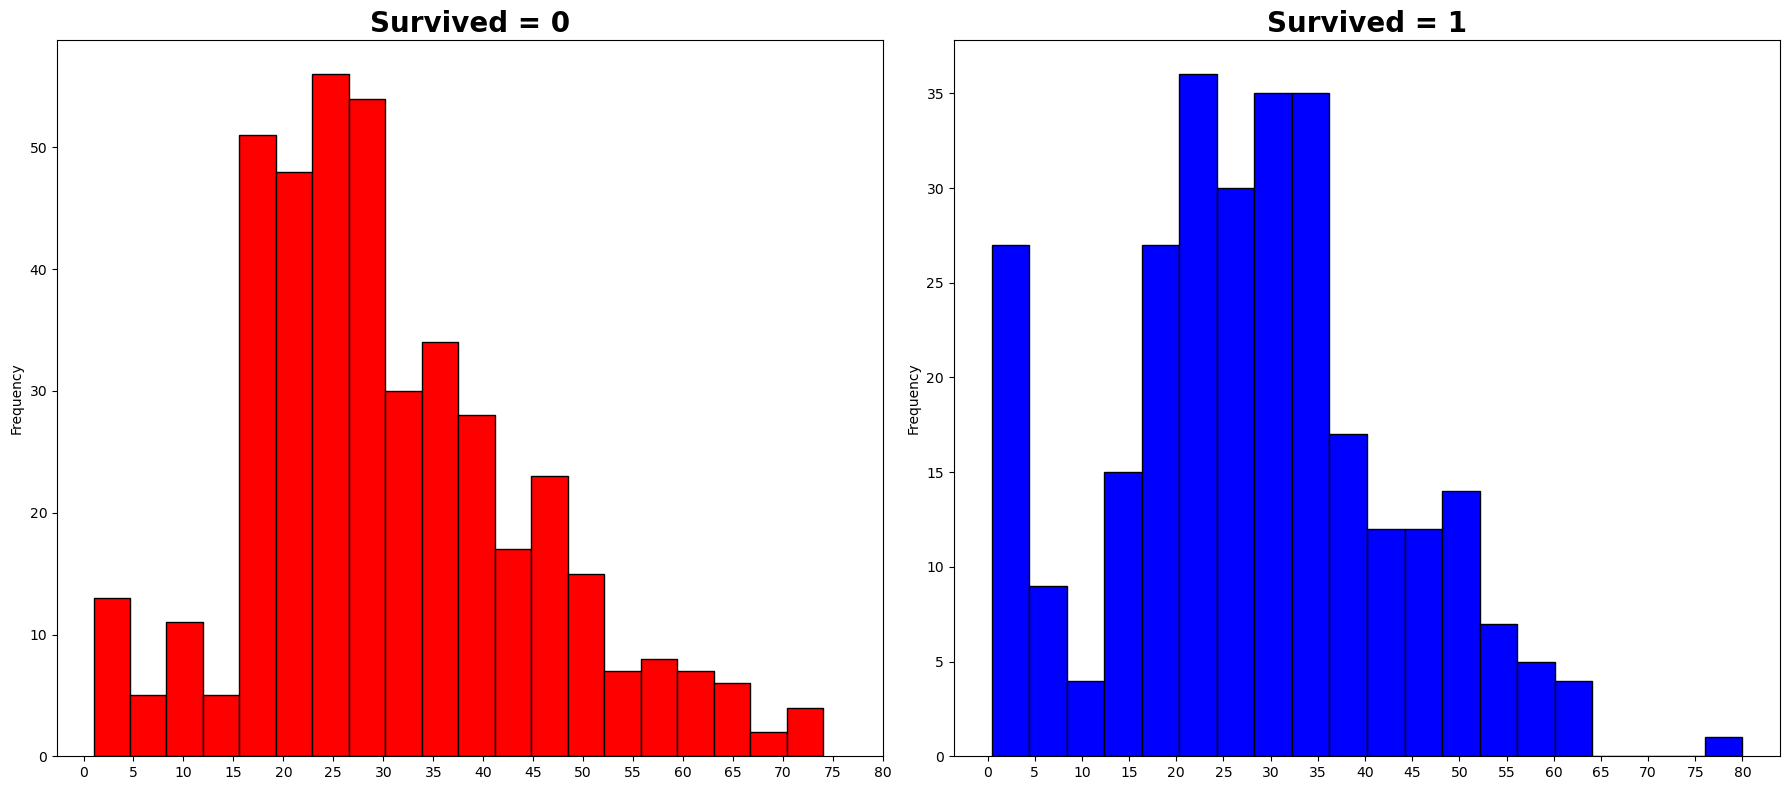

In [29]:
fig,ax=plt.subplots(1,2,figsize=(18,8))
data[data['Survived']==0].Age.plot.hist(ax=ax[0],bins=20,edgecolor='black',color='red')
ax[0].set_title('Survived = 0',fontsize=20,fontweight='heavy')
a=list(range(0,85,5))
ax[0].set_xticks(a)
data[data['Survived']==1].Age.plot.hist(ax=ax[1],bins=20,edgecolor='black',color='blue')
ax[1].set_title('Survived = 1',fontsize=20,fontweight='heavy')
aa=list(range(0,85,5))
ax[1].set_xticks(aa)
plt.show()


- **The oldest passenger was 80.**
- **Maximum numbers of death were in age group of 30-40.**

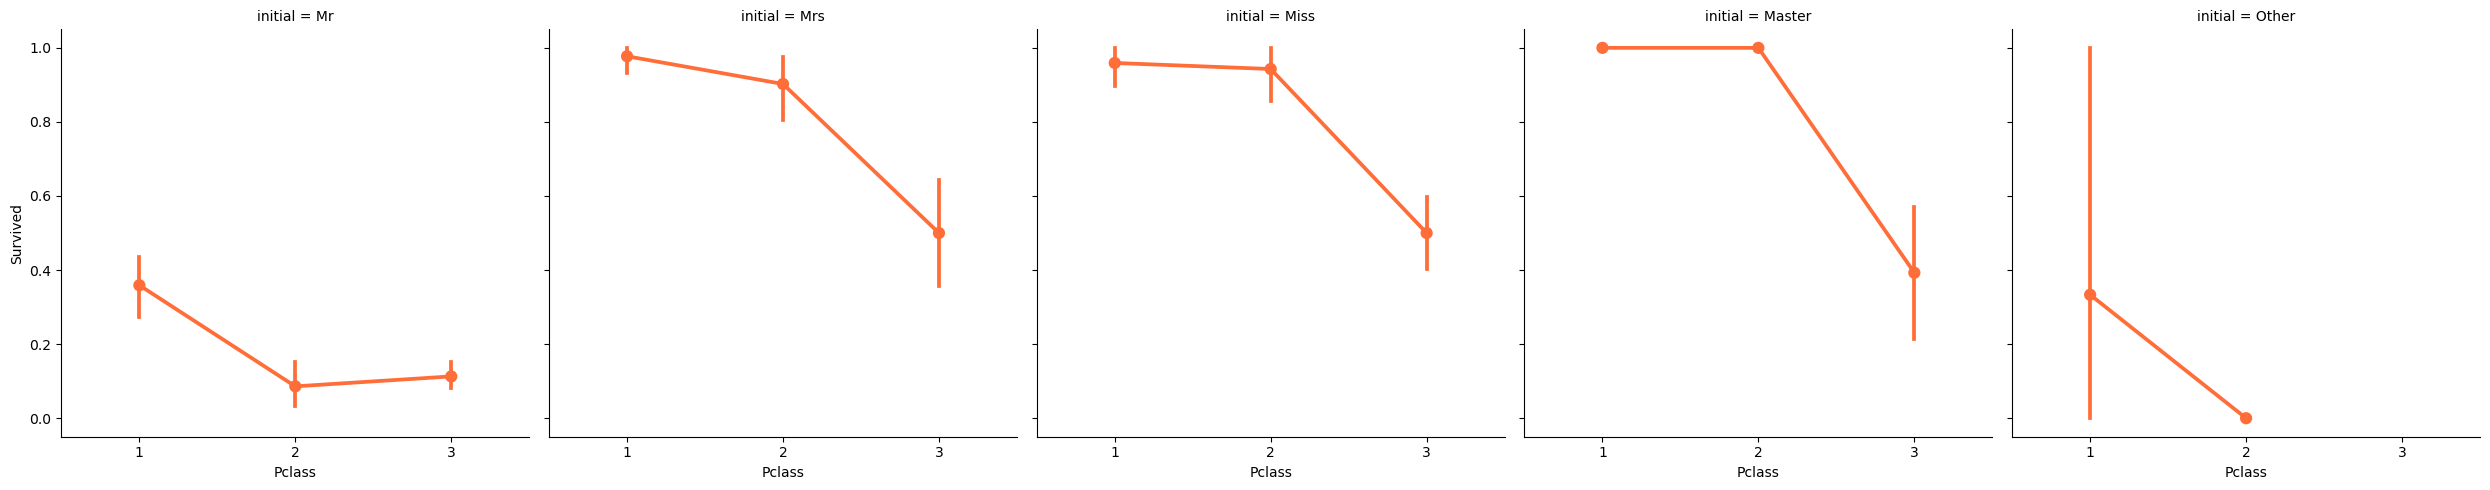

In [30]:
sns.catplot(x='Pclass',y='Survived',col='initial',kind='point', data=data)
plt.tight_layout()
plt.show()

**The women and child first policy thus hold true irrespective of the class.**

# Analysis Embarked vs Survival

In [31]:
pd.crosstab([data.Embarked,data.Pclass],[data.Sex,data.Survived],margins=True).style.background_gradient(cmap='summer_r')

# Chances of survival by port of Embarkation

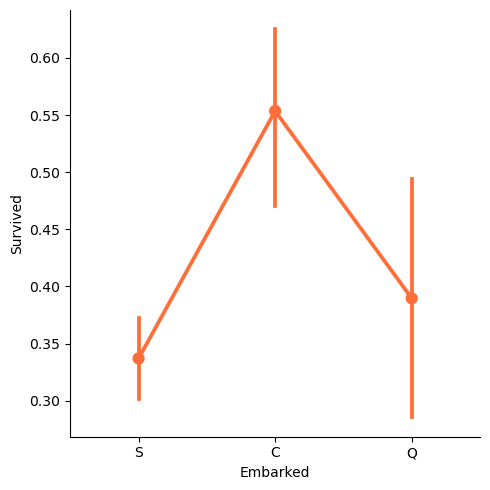

In [32]:
sns.catplot(x='Embarked',y='Survived',kind='point',data=data)
plt.show()

**The Chances for survival for port C is higher around 0.55 while it is lowest for S**

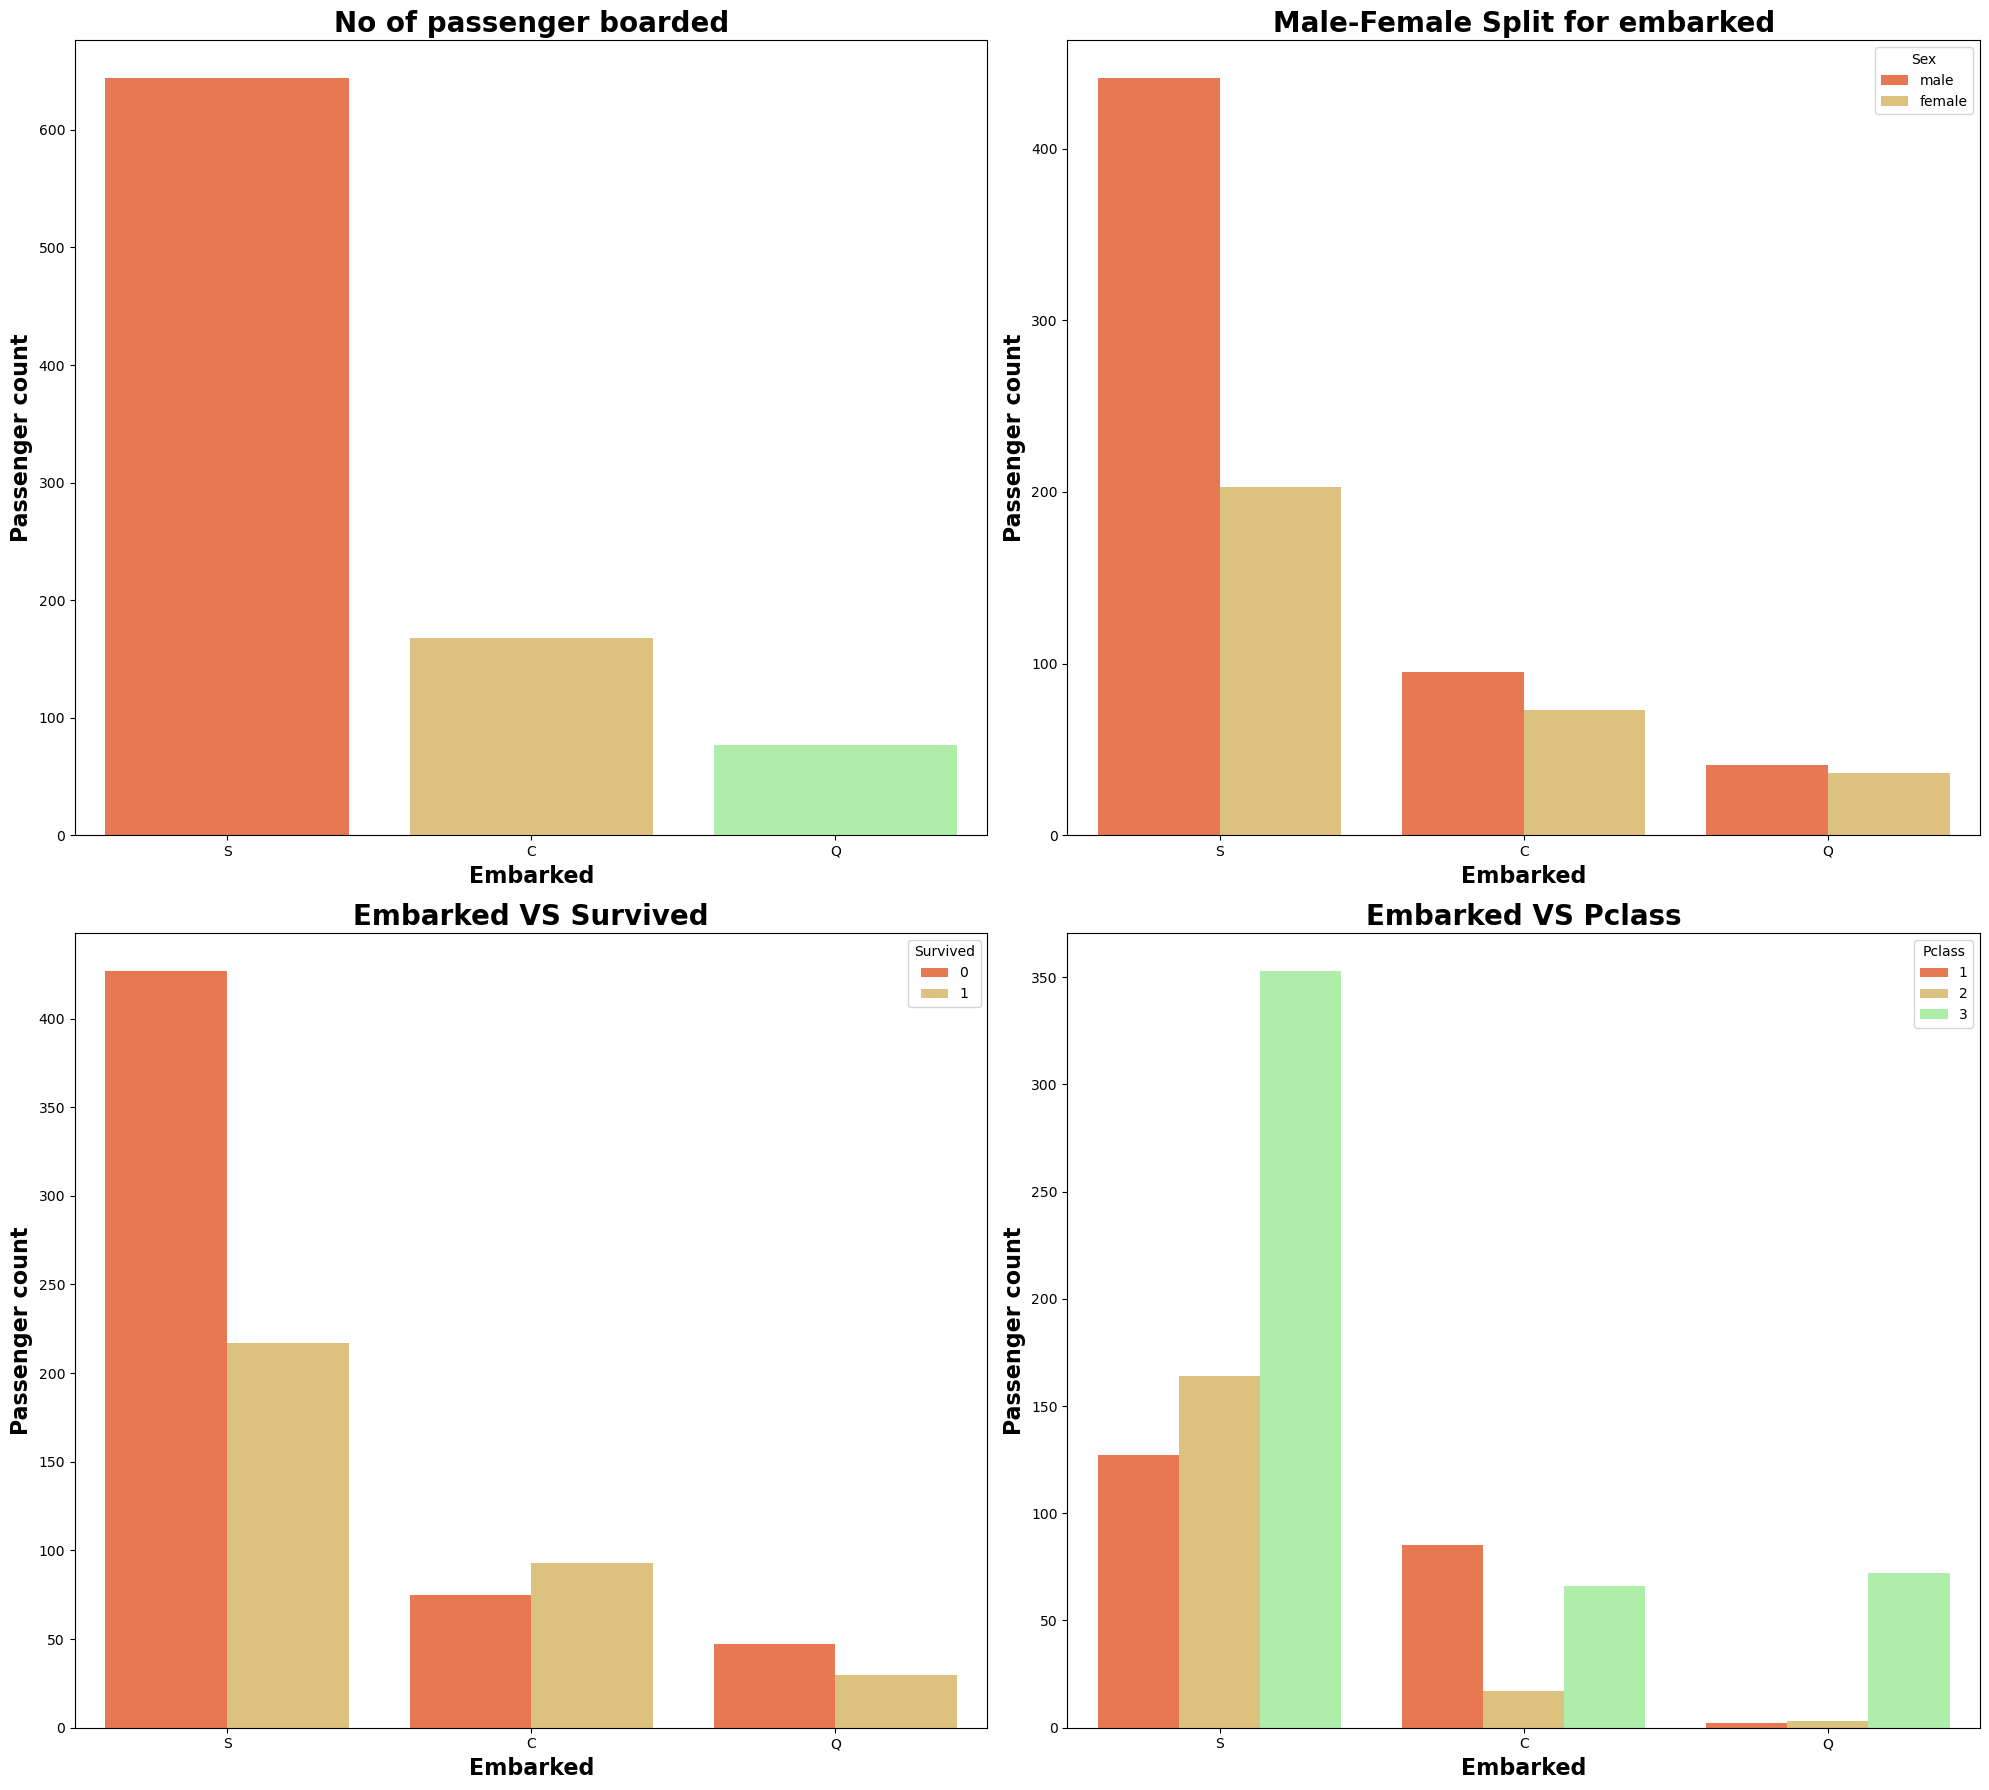

In [33]:
fig, ax = plt.subplots(2,2, figsize=(20,18))
sns.countplot(x='Embarked',data=data,ax=ax[0,0])
ax[0,0].set_title('No of passenger boarded', fontsize=20,fontweight='bold')
ax[0,0].set_xlabel('Embarked', fontsize=16,fontweight='bold')
ax[0,0].set_ylabel('Passenger count', fontsize=16,fontweight='bold')

sns.countplot(x='Embarked',hue='Sex',data=data,ax=ax[0,1])
ax[0,1].set_title('Male-Female Split for embarked', fontsize=20,fontweight='bold')
ax[0,1].set_xlabel('Embarked', fontsize=16,fontweight='bold')
ax[0,1].set_ylabel('Passenger count', fontsize=16,fontweight='bold')

sns.countplot(x='Embarked',hue='Survived',data=data,ax=ax[1,0])
ax[1,0].set_title('Embarked VS Survived', fontsize=20,fontweight='bold')
ax[1,0].set_xlabel('Embarked', fontsize=16,fontweight='bold')
ax[1,0].set_ylabel('Passenger count', fontsize=16,fontweight='bold')

sns.countplot(x='Embarked',hue='Pclass',data=data,ax=ax[1,1])
ax[1,1].set_title('Embarked VS Pclass', fontsize=20,fontweight='bold')
ax[1,1].set_xlabel('Embarked', fontsize=16,fontweight='bold')
ax[1,1].set_ylabel('Passenger count', fontsize=16,fontweight='bold')
plt.show()

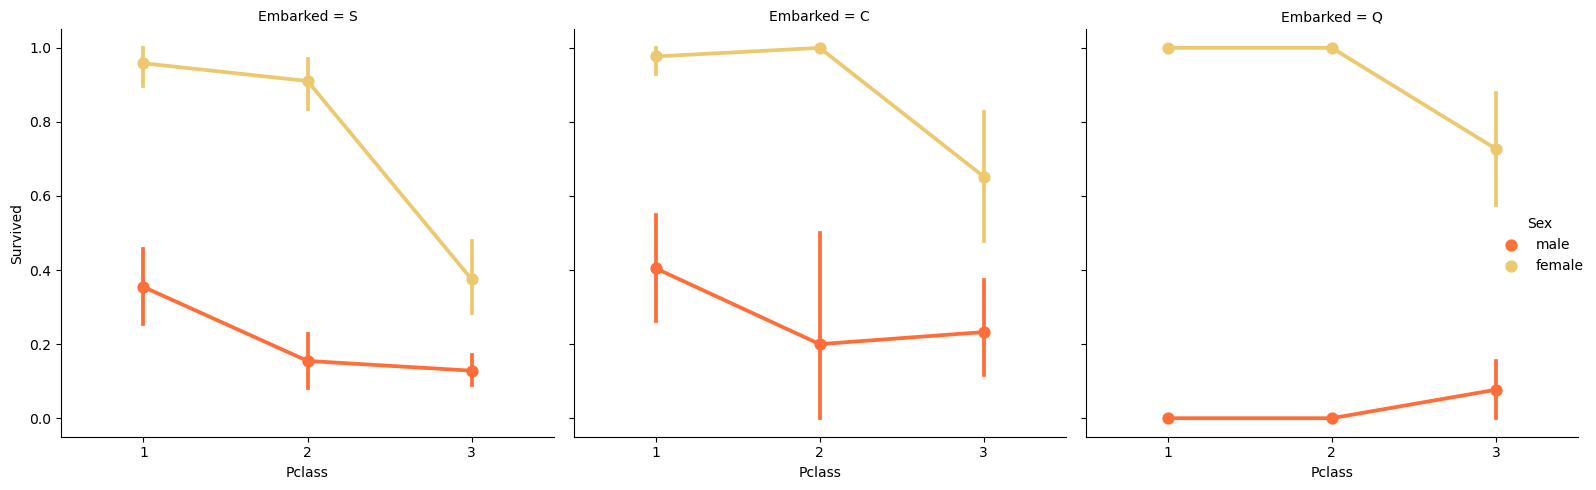

In [34]:
sns.catplot(x='Pclass',y='Survived',hue='Sex',col = 'Embarked',kind='point',data=data)
plt.show()

**Observation-:**

- **The Survival Chances are almost 1 for women for Pclass 2 irrespective of the Pclass**
- **Port S looks to be very lucky for Pclass 3 passenger as the servive rate for both men and women is very low.**
- **Port Q looks to be unluckiest for men, as almost all were from Pclass 3.**

# Filling Embarked Null Values

As we saw that maximum passenger boarded from port S, we replaced NaN with S

In [35]:
data['Embarked'].fillna('S',inplace=True)

In [36]:
data.Embarked.isnull().sum()

0

# SibSip VS Survived

In [37]:
pd.crosstab([data.SibSp],[data.Survived],margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
SibSp,,,
0,398,210,608
1,97,112,209
2,15,13,28
3,12,4,16
4,15,3,18
5,5,0,5
8,7,0,7
All,549,342,891


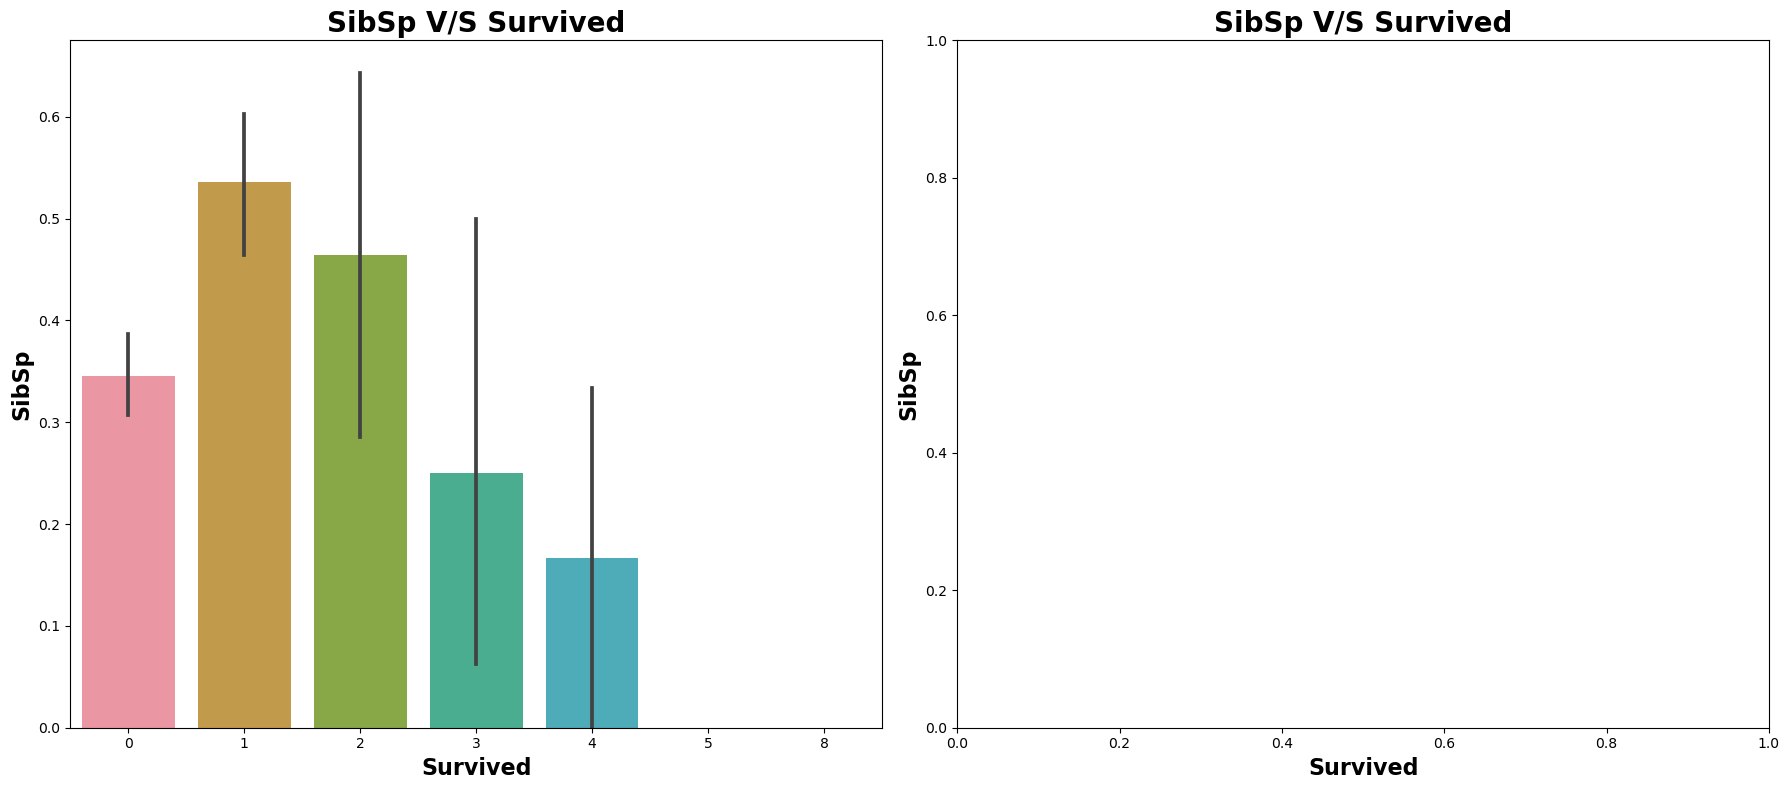

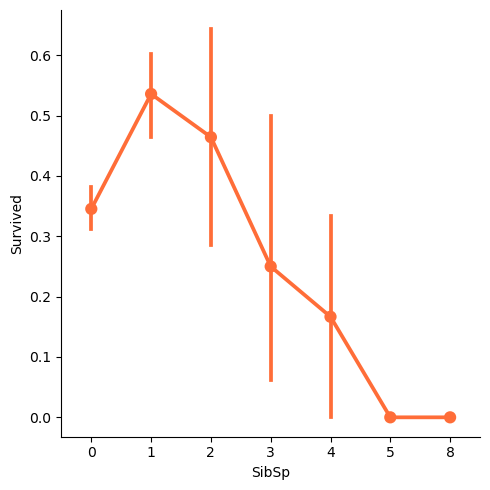

In [38]:
fig, ax = plt.subplots(1,2, figsize=(18,8))
sns.barplot(x='SibSp',y='Survived',data=data,ax=ax[0])
ax[0].set_title('SibSp V/S Survived', fontsize=20,fontweight='bold')
ax[0].set_xlabel('Survived', fontsize=16,fontweight='bold')
ax[0].set_ylabel('SibSp', fontsize=16,fontweight='bold')

sns.catplot(x='SibSp',y='Survived',kind='point',data=data,ax=ax[1])
ax[1].set_title('SibSp V/S Survived', fontsize=20,fontweight='bold')
ax[1].set_xlabel('Survived', fontsize=16,fontweight='bold')
ax[1].set_ylabel('SibSp', fontsize=16,fontweight='bold')
plt.show()

In [39]:
pd.crosstab([data.SibSp],[data.Pclass], margins=True).style.background_gradient(cmap='summer_r')

Pclass,1,2,3,All
SibSp,,,,
0,137,120,351,608
1,71,55,83,209
2,5,8,15,28
3,3,1,12,16
4,0,0,18,18
5,0,0,5,5
8,0,0,7,7
All,216,184,491,891


# Parch vs Survial

In [40]:
pd.crosstab([data.Parch],[data.Pclass], margins=True).style.background_gradient(cmap='summer_r')

Pclass,1,2,3,All
Parch,,,,
0,163,134,381,678
1,31,32,55,118
2,21,16,43,80
3,0,2,3,5
4,1,0,3,4
5,0,0,5,5
6,0,0,1,1
All,216,184,491,891


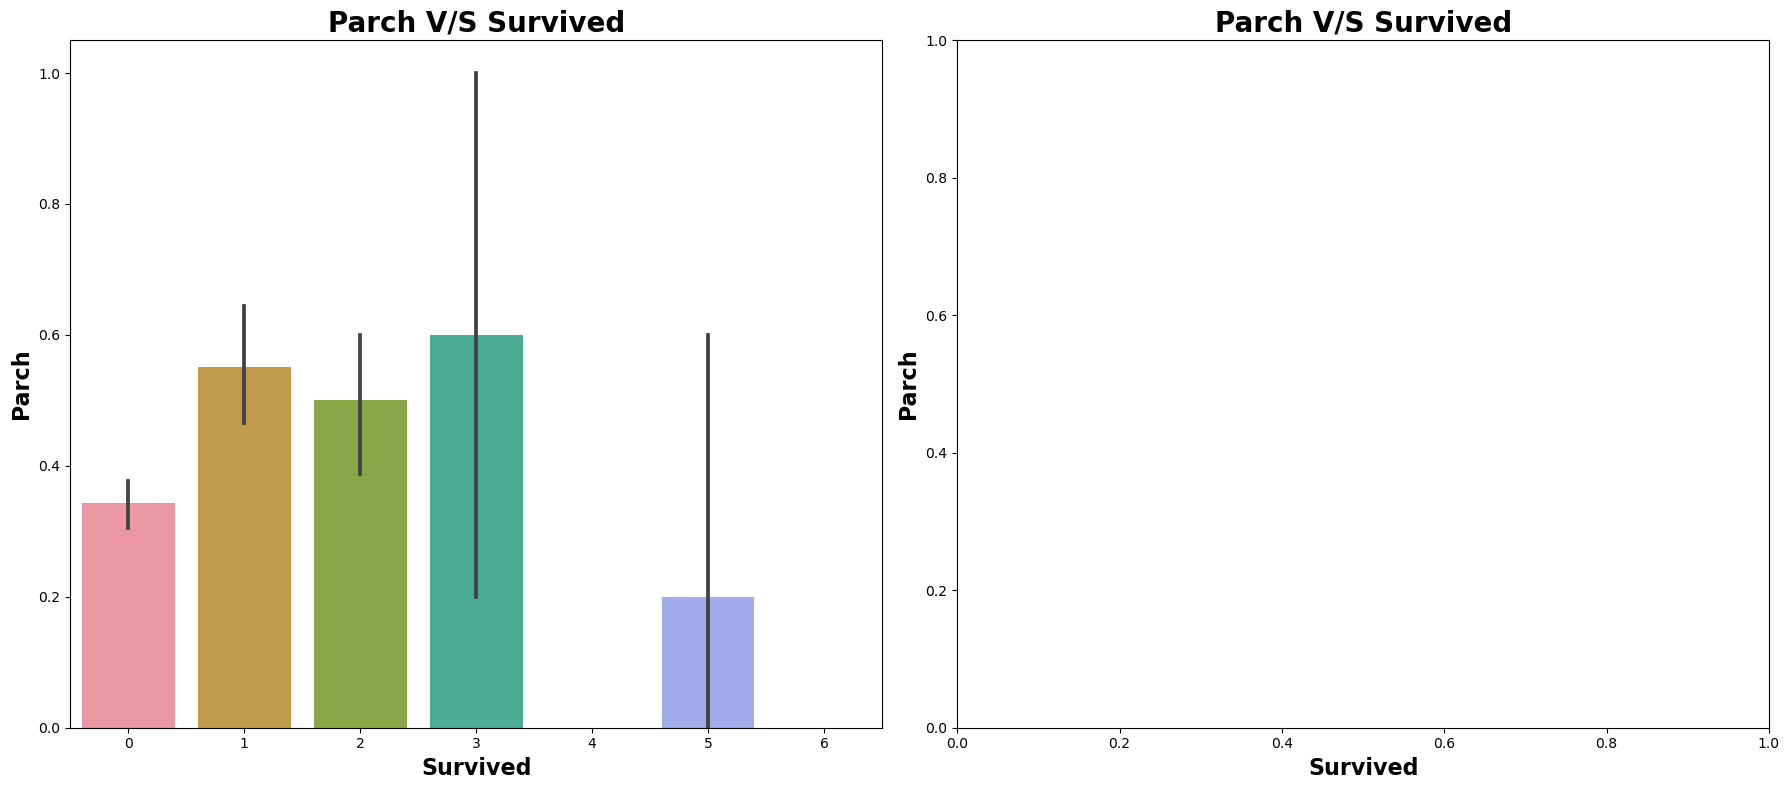

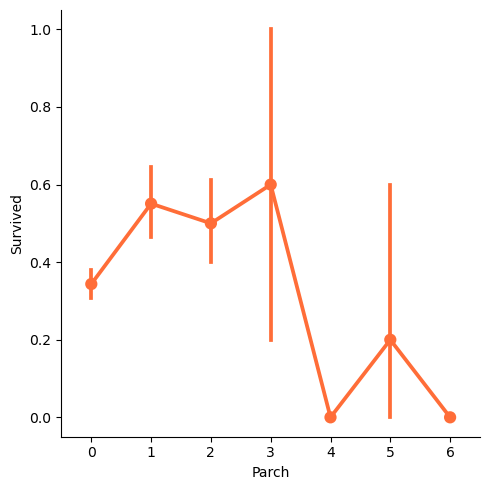

In [41]:
fig, ax = plt.subplots(1,2, figsize=(18,8))
sns.barplot(x='Parch',y='Survived',data=data,ax=ax[0])
ax[0].set_title('Parch V/S Survived', fontsize=20,fontweight='bold')
ax[0].set_xlabel('Survived', fontsize=16,fontweight='bold')
ax[0].set_ylabel('Parch', fontsize=16,fontweight='bold')

sns.catplot(x='Parch',y='Survived',kind='point',data=data,ax=ax[1])
ax[1].set_title('Parch V/S Survived', fontsize=20,fontweight='bold')
ax[1].set_xlabel('Survived', fontsize=16,fontweight='bold')
ax[1].set_ylabel('Parch', fontsize=16,fontweight='bold')
plt.show()

**Observation-:**

- Here too the results are quite similar.**passenger with their parents onboard have greater chance of survival.** it however reduces as the number goes up.

- **The chances of survival is good for somebody who has 1-3 parents on the ship**

# Fare vs Survival

In [42]:
print('Highest Fare was :',data['Fare'].max())
print('Lowest Fare was :',data['Fare'].min())
print('Average Fare was :',data['Fare'].mean())

Highest Fare was : 512.3292
Lowest Fare was : 0.0
Average Fare was : 32.204207968574636


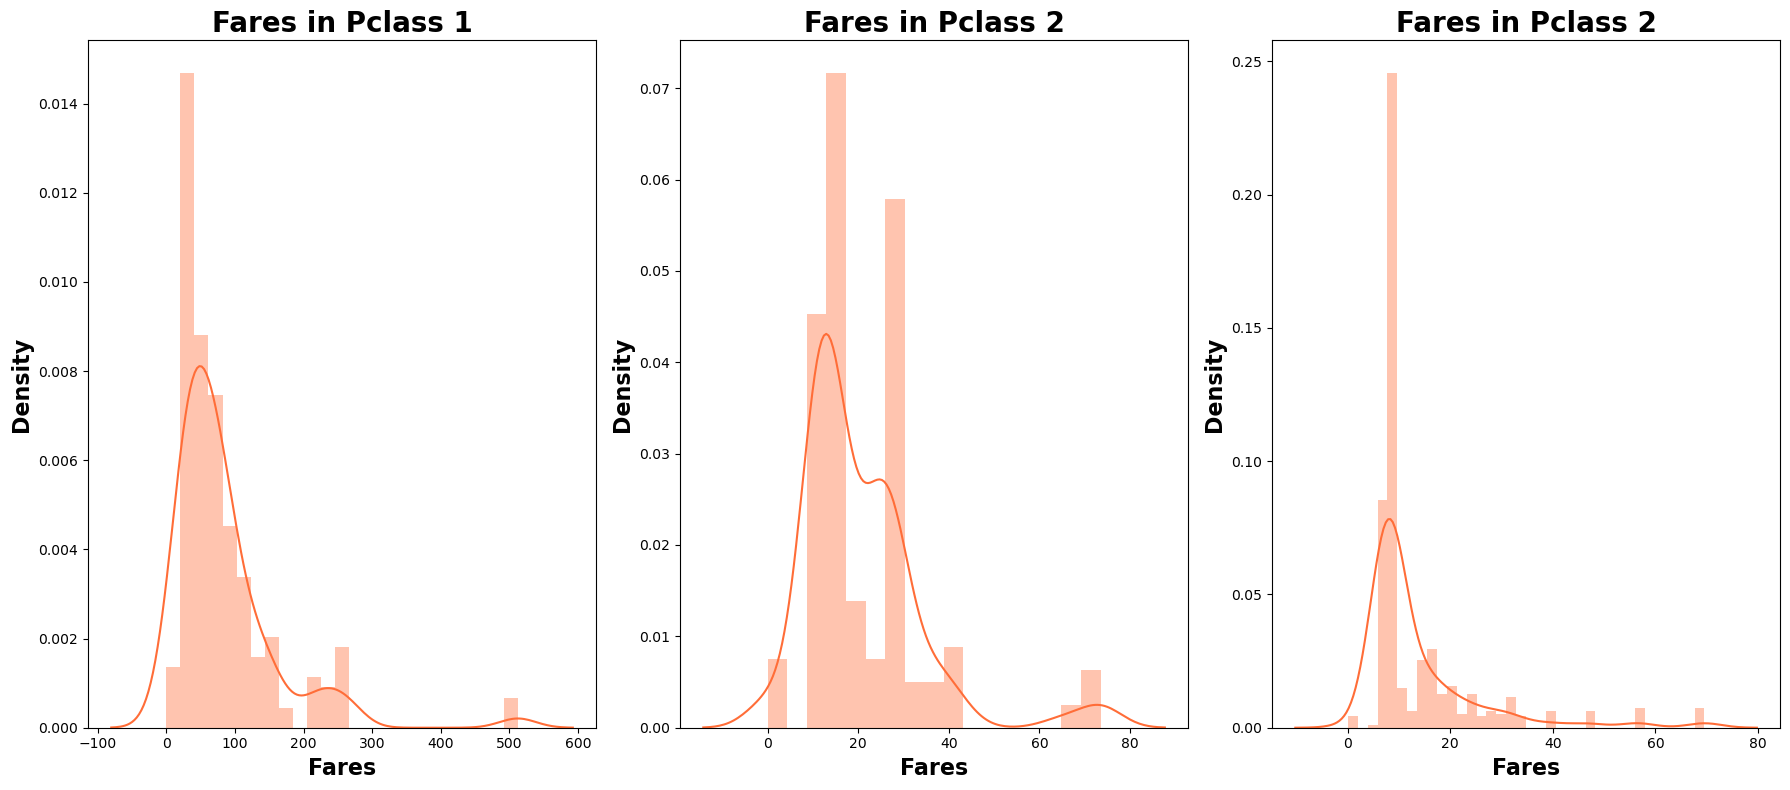

In [43]:
fig, ax = plt.subplots(1,3, figsize=(18,8))
sns.distplot(data[data['Pclass']==1].Fare,ax=ax[0])
ax[0].set_title('Fares in Pclass 1', fontsize=20,fontweight='bold')
ax[0].set_xlabel('Fares', fontsize=16,fontweight='bold')
ax[0].set_ylabel('Density', fontsize=16,fontweight='bold')

sns.distplot(data[data['Pclass']==2].Fare,ax=ax[1])
ax[1].set_title('Fares in Pclass 2', fontsize=20,fontweight='bold')
ax[1].set_xlabel('Fares', fontsize=16,fontweight='bold')
ax[1].set_ylabel('Density', fontsize=16,fontweight='bold')

sns.distplot(data[data['Pclass']==3].Fare,ax=ax[2])
ax[2].set_title('Fares in Pclass 2', fontsize=20,fontweight='bold')
ax[2].set_xlabel('Fares', fontsize=16,fontweight='bold')
ax[2].set_ylabel('Density', fontsize=16,fontweight='bold')
plt.show()

- **There looks to be a large distribution in the fares of passengers in Pclass and this distribution goes on decreasing as the standard reduces. As this is also continous, we can convert into discrete values by using binning.**

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


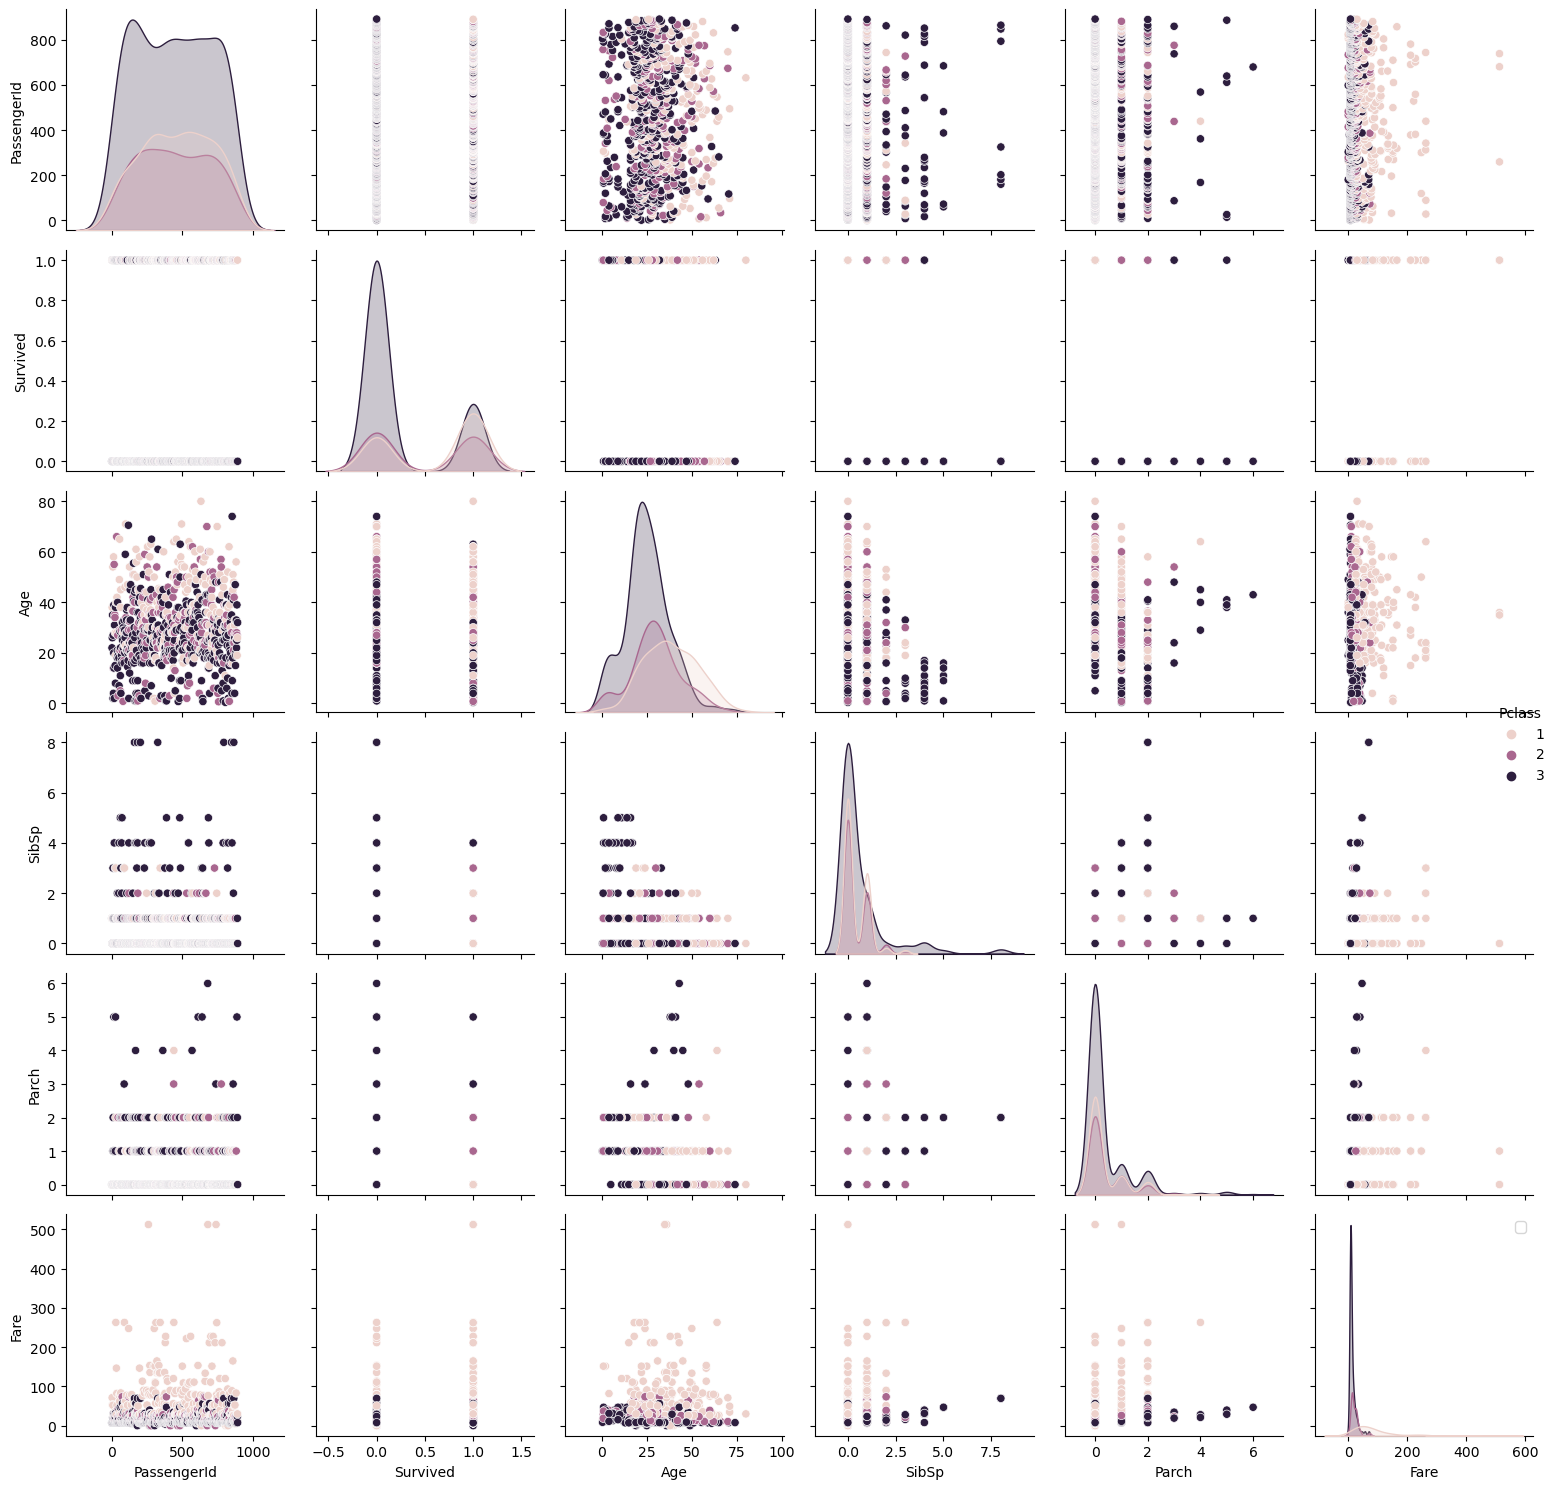

In [44]:
sns.pairplot(data=data, hue='Pclass')
plt.legend()
plt.show()

# Correlation

In [45]:
data.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


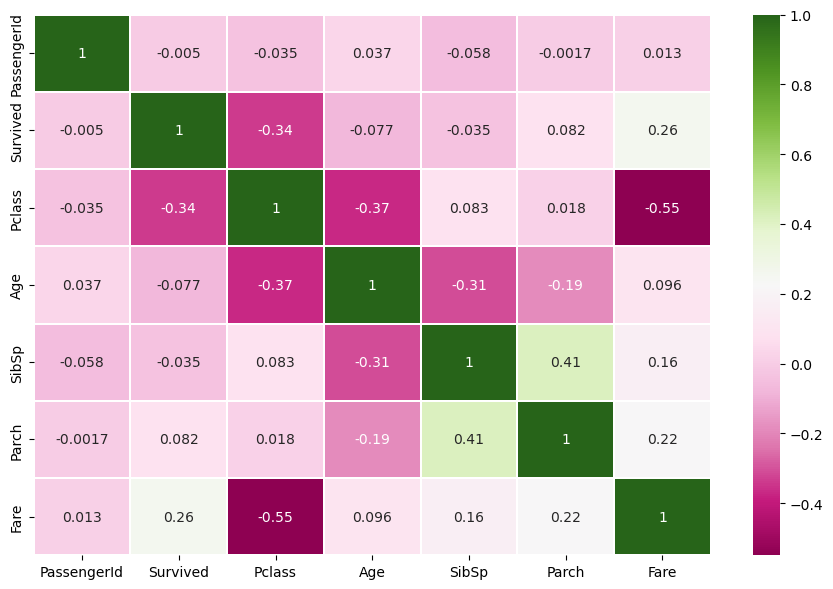

In [46]:
plt.figure(figsize=(9,6))
sns.heatmap(data.corr(), annot=True, cmap='PiYG', linewidths=0.3)
plt.show()

# correlation with target variable survived 

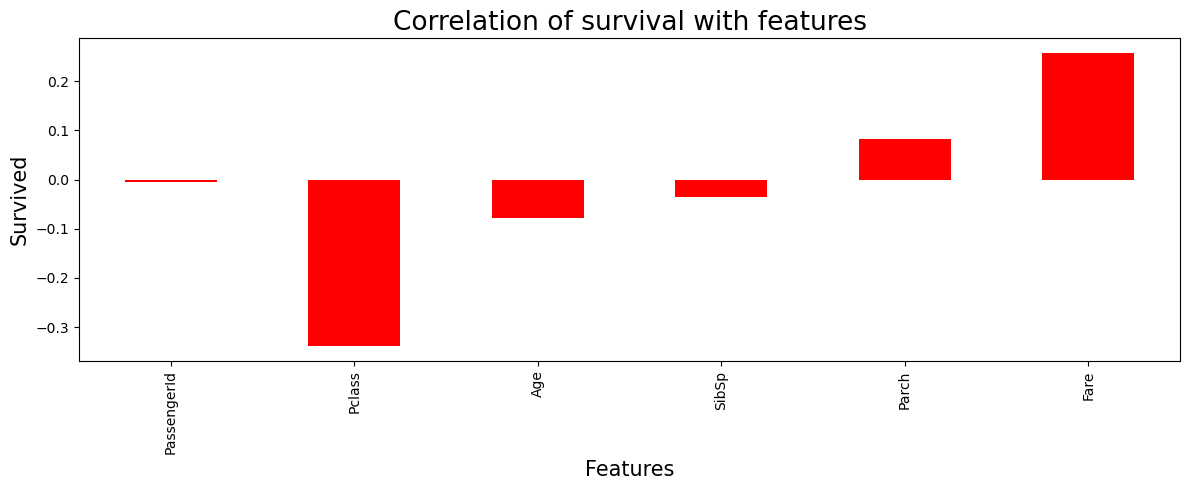

In [47]:
plt.figure(figsize = (12,5))
data.corr()['Survived'].drop(['Survived']).plot(kind='bar', color = 'r')
plt.xlabel('Features', fontsize=15)
plt.ylabel('Survived',fontsize=15)
plt.title('Correlation of survival with features', fontsize=19)
plt.show()

# Outlier Detection and removal

In [48]:
# As we have lot of column lets sort columns by their datatype
data.columns.to_series().groupby(data.dtypes).groups

{int64: ['PassengerId', 'Survived', 'Pclass', 'SibSp', 'Parch'], float64: ['Age', 'Fare'], object: ['Name', 'Sex', 'Ticket', 'Embarked', 'initial']}

In [49]:
#Droping unnecssary column for future investigation 
data.drop(["PassengerId","Name","Ticket"],axis=1,inplace=True)

In [50]:
data.columns.to_series().groupby(data.dtypes).groups

{int64: ['Survived', 'Pclass', 'SibSp', 'Parch'], float64: ['Age', 'Fare'], object: ['Sex', 'Embarked', 'initial']}

In [51]:
Numerical_features=['Survived', 'Pclass', 'SibSp', 'Parch','Age', 'Fare']
categorical_features=['Sex', 'Embarked', 'initial']

**identifier the outlierusing boxplot**

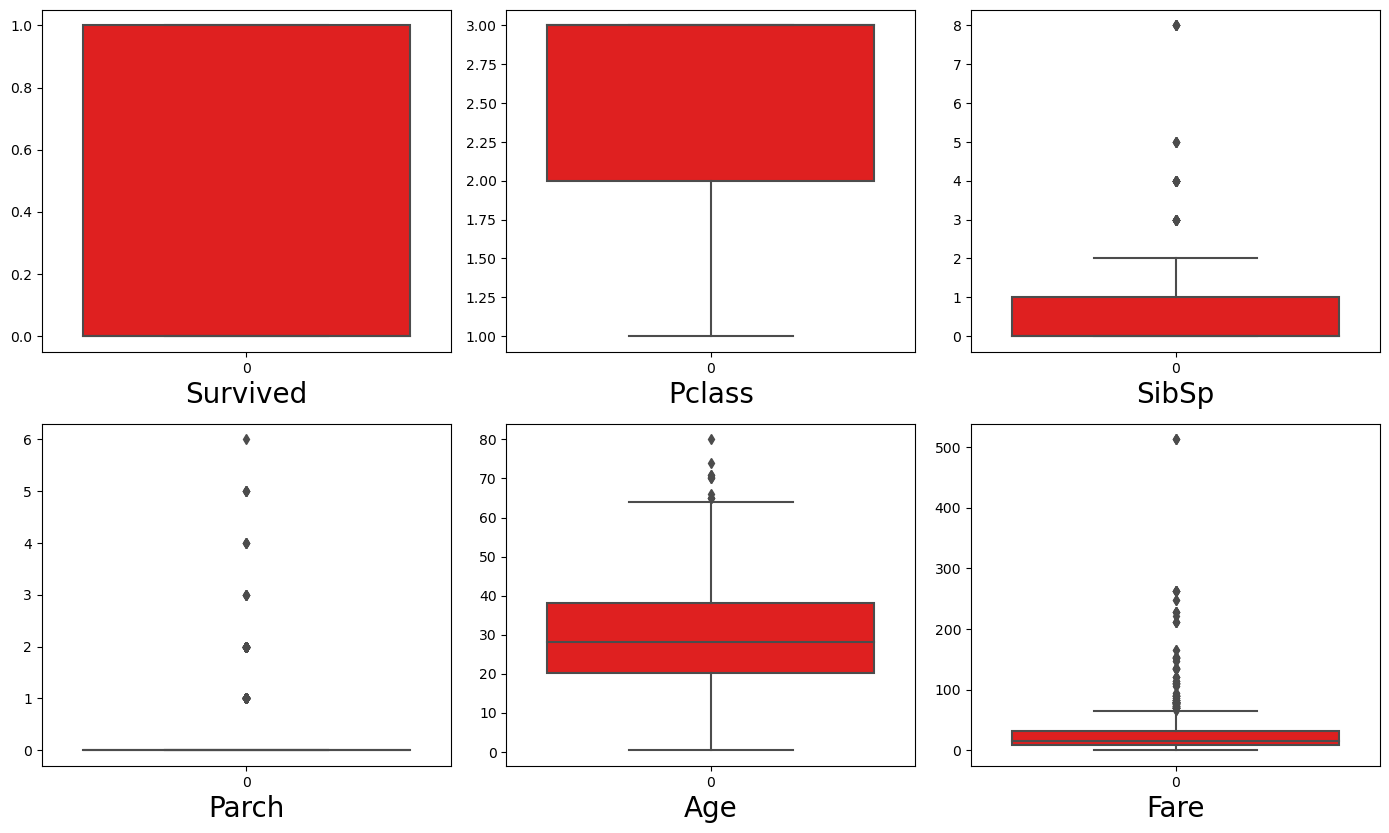

In [52]:
plt.figure(figsize=(14,12), facecolor='white')
plotnumber = 1
for i in Numerical_features:
    if plotnumber<=10:
        ax=plt.subplot(3,3,plotnumber)
        sns.boxplot(data[i], color='red')
        plt.xlabel(i,fontsize=20)
    plotnumber+=1
plt.tight_layout()

- we can see that continous features like age & fare contains outlier

In [53]:
#outlier detection
def out(data,n,features):
    outlier=[]
    #iterate over features(column)
    for col in features:
        #1st quartile(25%)
        Q1= np.percentile(data[col],25)
         #3rd quartile(75%)
        Q3= np.percentile(data[col],75)
        #interquartile range(IQR)
        IQR= Q3 - Q1 
        #outlier step
        out_sleep = 1.5*IQR
        # determine a list of indices of outlier for feature col
        out_list = data[(data[col]< Q1 -  out_sleep) | (data[col] > Q3 + out_sleep )].index
        #append the found outlier indices for col to the list of outlier indices
        outlier.extend( out_list)
        #select observation containing more than 2 outliers
        outlier = Counter(outlier)
        multiple_outlier= list(k for k, v in outlier.items() if v > n)
        return multiple_outlier
        
        
       
        

In [54]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,initial
0,0,3,male,22.0,1,0,7.2500,S,Mr
1,1,1,female,38.0,1,0,71.2833,C,Mrs
2,1,3,female,26.0,0,0,7.9250,S,Miss
3,1,1,female,35.0,1,0,53.1000,S,Mrs
4,0,3,male,35.0,0,0,8.0500,S,Mr


In [55]:
#detection outlier from age, sibsp, parch and fare
from collections import Counter
Outliers_to_drop = out(data,2,['Age','SinSp','Parch','Fare'])

In [56]:
#Drop outlier
data = data.drop(Outliers_to_drop, axis = 0).reset_index(drop=True)

In [57]:
data.shape

(891, 9)

In [58]:
# filling missing value of age
index_NaN_age = list(data['Age'][data['Age'].isnull()].index)

for i in index_NaN_age:
    age_med = data['Age'].median()
    age_pred = data["Age"][((data['SibSp'] == data.iloc[i]["SibSp"]) & (data['Parch'] == data.iloc[i]["Parch"]) & (data['Pclass'] == data.iloc[i]["Pclass"]))].median()
    if not np.isnan(age_pred) :
        data['Age'].iloc[i] =  age_pred
    else:
         data['Age'].iloc[i] =  age_med

# Encoding-:

In [59]:
from sklearn.preprocessing import LabelEncoder
l = LabelEncoder()
for i in categorical_features:
    data[i] = l.fit_transform(data[i])
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,initial
0,0,3,1,22.0,1,0,7.2500,2,2
1,1,1,0,38.0,1,0,71.2833,0,3
2,1,3,0,26.0,0,0,7.9250,2,1
3,1,1,0,35.0,1,0,53.1000,2,3
4,0,3,1,35.0,0,0,8.0500,2,2


# Standard Scaler

In [60]:
# splitting data in target and dependent features
x= data.drop(['Survived'],axis=1)
y = data['Survived']

In [61]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scale= scaler.fit_transform(x)

# Machine Learning and Model Building

In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.model_selection import train_test_split,cross_val_score


In [63]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.25, random_state=67)
print('Training feature matrix size:', x_train.shape)
print('Training target vector :',y_train.shape)
print('Test feature matrix size :',x_test.shape)
print('Test target vector size :', y_test.shape)

Training feature matrix size: (668, 8)
Training target vector : (668,)
Test feature matrix size : (223, 8)
Test target vector size : (223,)


**Find best random state**

In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score
maxAccu=0
maxRs=0
for i in range (1,200):
    x_train,x_test,y_train,y_test= train_test_split(x,y,test_size = 0.33, random_state=i)
    lr = LogisticRegression()
    lr.fit(x_train,y_train)
    y_pred=lr.predict(x_test)
    acc = accuracy_score(y_test, y_pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best accuracy is', maxAccu, 'on Random_state',maxRS)


Best accuracy is 0.8677966101694915 on Random_state 150


# **Logistic Regression**

In [65]:
x_train,x_test,y_train,y_test = train_test_split(x_scale,y,test_size=.25,random_state=69)
lrr = LogisticRegression()
lrr.fit(x_train,y_train)
y_pred = lrr.predict(x_test)
print("Logistic Regression Evaluation")
print('\n')
print("Accuracy Score Of Logistic Regression : ",accuracy_score(y_test,y_pred))
print("Confusion Matrix Of Logistic Regression : ",confusion_matrix(y_test,y_pred))
print("Classification Report Of Logistic Regression : ", classification_report(y_test,y_pred))

Logistic Regression Evaluation


Accuracy Score Of Logistic Regression :  0.8161434977578476
Confusion Matrix Of Logistic Regression :  [[120  20]
 [ 21  62]]
Classification Report Of Logistic Regression :                precision    recall  f1-score   support

           0       0.85      0.86      0.85       140
           1       0.76      0.75      0.75        83

    accuracy                           0.82       223
   macro avg       0.80      0.80      0.80       223
weighted avg       0.82      0.82      0.82       223



In [66]:
cv_score = cross_val_score(lrr, x_scale,y,cv=5)
print("Cross Validation Score",lrr)
print("CVS Score : ", cv_score)
print("Mean CVS Score : ", cv_score.mean())
print("Std Deviation : ",cv_score.std())

Cross Validation Score LogisticRegression()
CVS Score :  [0.77653631 0.79775281 0.7752809  0.79775281 0.83146067]
Mean CVS Score :  0.7957567007720796
Std Deviation :  0.020353989224211392


# Decision Tree Classifier

In [67]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred = dt.predict(x_test)
print("Decision Tree Classifier Evaluation")
print('\n')
print("Accuracy Score Of Decision Tree Classifier : ",accuracy_score(y_test,y_pred))
print("Confusion Matrix Of Decision Tree Classifier : ",confusion_matrix(y_test,y_pred))
print("Classification Report Of Decision Tree Classifier : ", classification_report(y_test,y_pred))

Decision Tree Classifier Evaluation


Accuracy Score Of Decision Tree Classifier :  0.7533632286995515
Confusion Matrix Of Decision Tree Classifier :  [[112  28]
 [ 27  56]]
Classification Report Of Decision Tree Classifier :                precision    recall  f1-score   support

           0       0.81      0.80      0.80       140
           1       0.67      0.67      0.67        83

    accuracy                           0.75       223
   macro avg       0.74      0.74      0.74       223
weighted avg       0.75      0.75      0.75       223



In [68]:
cv_score = cross_val_score(dt, x_scale,y,cv=5)
print("Cross Validation Score",dt)
print("CVS Score : ", cv_score)
print("Mean CVS Score : ", cv_score.mean())
print("Std Deviation : ",cv_score.std())

Cross Validation Score DecisionTreeClassifier()
CVS Score :  [0.73184358 0.78651685 0.84269663 0.74719101 0.79213483]
Mean CVS Score :  0.7800765802523383
Std Deviation :  0.03877120705874569


# Random Forest Classifier

In [69]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)
print("Random Forest Classifier Evaluation")
print('\n')
print("Accuracy Score Of Random Forest Classifier : ",accuracy_score(y_test,y_pred))
print("Confusion Matrix Of Random Forest Classifier : ",confusion_matrix(y_test,y_pred))
print("Classification Report Of Random Forest Classifier : ", classification_report(y_test,y_pred))

Random Forest Classifier Evaluation


Accuracy Score Of Random Forest Classifier :  0.8116591928251121
Confusion Matrix Of Random Forest Classifier :  [[121  19]
 [ 23  60]]
Classification Report Of Random Forest Classifier :                precision    recall  f1-score   support

           0       0.84      0.86      0.85       140
           1       0.76      0.72      0.74        83

    accuracy                           0.81       223
   macro avg       0.80      0.79      0.80       223
weighted avg       0.81      0.81      0.81       223



In [70]:
cv_score = cross_val_score(rf, x_scale,y,cv=5)
print("Cross Validation Score",rf)
print("CVS Score : ", cv_score)
print("Mean CVS Score : ", cv_score.mean())
print("Std Deviation : ",cv_score.std())

Cross Validation Score RandomForestClassifier()
CVS Score :  [0.80446927 0.79213483 0.86516854 0.78089888 0.84831461]
Mean CVS Score :  0.8181972255351202
Std Deviation :  0.0327787518466747


# AdaBoost Classifier

In [71]:
ad = AdaBoostClassifier()
ad.fit(x_train,y_train)
y_pred = ad.predict(x_test)
print("AdaBoost Classifier Evaluation")
print('\n')
print("Accuracy Score Of AdaBoost Classifier : ",accuracy_score(y_test,y_pred))
print("Confusion Matrix Of AdaBoost Classifier : ",confusion_matrix(y_test,y_pred))
print("Classification Report Of AdaBoost Classifier : ", classification_report(y_test,y_pred))

AdaBoost Classifier Evaluation


Accuracy Score Of AdaBoost Classifier :  0.852017937219731
Confusion Matrix Of AdaBoost Classifier :  [[124  16]
 [ 17  66]]
Classification Report Of AdaBoost Classifier :                precision    recall  f1-score   support

           0       0.88      0.89      0.88       140
           1       0.80      0.80      0.80        83

    accuracy                           0.85       223
   macro avg       0.84      0.84      0.84       223
weighted avg       0.85      0.85      0.85       223



In [72]:
cv_score = cross_val_score(ad, x_scale,y,cv=5)
print("Cross Validation Score",ad)
print("CVS Score : ", cv_score)
print("Mean CVS Score : ", cv_score.mean())
print("Std Deviation : ",cv_score.std())

Cross Validation Score AdaBoostClassifier()
CVS Score :  [0.79888268 0.80898876 0.82022472 0.82022472 0.86516854]
Mean CVS Score :  0.8226978846274559
Std Deviation :  0.022676390762370765


# Gradient Boosting Classifier

In [73]:
gb = GradientBoostingClassifier()
gb.fit(x_train,y_train)
y_pred = gb.predict(x_test)
print("Gradient Boosting Classifier Evaluation")
print('\n')
print("Accuracy Score Of Gradient Boosting Classifier : ",accuracy_score(y_test,y_pred))
print("Confusion Matrix Of Gradient Boosting Classifier : ",confusion_matrix(y_test,y_pred))
print("Classification Report Of Gradient Boosting Classifier : ", classification_report(y_test,y_pred))

Gradient Boosting Classifier Evaluation


Accuracy Score Of Gradient Boosting Classifier :  0.8430493273542601
Confusion Matrix Of Gradient Boosting Classifier :  [[129  11]
 [ 24  59]]
Classification Report Of Gradient Boosting Classifier :                precision    recall  f1-score   support

           0       0.84      0.92      0.88       140
           1       0.84      0.71      0.77        83

    accuracy                           0.84       223
   macro avg       0.84      0.82      0.83       223
weighted avg       0.84      0.84      0.84       223



In [74]:
cv_score = cross_val_score(gb, x_scale,y,cv=5)
print("Cross Validation Score",gb)
print("CVS Score : ", cv_score)
print("Mean CVS Score : ", cv_score.mean())
print("Std Deviation : ",cv_score.std())

Cross Validation Score GradientBoostingClassifier()
CVS Score :  [0.82681564 0.81460674 0.85393258 0.78651685 0.85955056]
Mean CVS Score :  0.8282844768062269
Std Deviation :  0.026717656046590932


# Hyper Parameter Tunning: GridSearchCV

In [75]:
from sklearn.model_selection import GridSearchCV

In [76]:
parameter= [{'fit_intercept': [True, False],
            'penalty': ['l1','l2'],
            'solver': ['newton-cg','lbfgs','liblinear','sag','saga'],
            'random_state': [69]
            }]

In [77]:
gc = GridSearchCV(LogisticRegression(),parameter,verbose=5)
gc.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END fit_intercept=True, penalty=l1, random_state=69, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END fit_intercept=True, penalty=l1, random_state=69, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END fit_intercept=True, penalty=l1, random_state=69, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END fit_intercept=True, penalty=l1, random_state=69, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END fit_intercept=True, penalty=l1, random_state=69, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END fit_intercept=True, penalty=l1, random_state=69, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END fit_intercept=True, penalty=l1, random_state=69, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END fit_intercept=True, penalty=l1, random_state=69, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END fit_intercept=True, penalty=l1, random_state=69, solver=l

GridSearchCV(estimator=LogisticRegression(),
             param_grid=[{'fit_intercept': [True, False],
                          'penalty': ['l1', 'l2'], 'random_state': [69],
                          'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                     'saga']}],
             verbose=5)

In [78]:
gc.best_params_

{'fit_intercept': True,
 'penalty': 'l2',
 'random_state': 69,
 'solver': 'newton-cg'}

# Final model

In [79]:
final = LogisticRegression(fit_intercept= True, penalty = 'l2',random_state = 69, solver = 'newton-cg')
final.fit(x_train,y_train)
y_pred = final.predict(x_test)
print(" Final Random Forest Classifier Evaluation")
print('\n')
print("Accuracy Score Of Random Forest Classifier : ",accuracy_score(y_test,y_pred))
print("Confusion Matrix Of Random Forest Classifier : ",confusion_matrix(y_test,y_pred))
print("Classification Report Of Random Forest Classifier : ", classification_report(y_test,y_pred))

 Final Random Forest Classifier Evaluation


Accuracy Score Of Random Forest Classifier :  0.8161434977578476
Confusion Matrix Of Random Forest Classifier :  [[120  20]
 [ 21  62]]
Classification Report Of Random Forest Classifier :                precision    recall  f1-score   support

           0       0.85      0.86      0.85       140
           1       0.76      0.75      0.75        83

    accuracy                           0.82       223
   macro avg       0.80      0.80      0.80       223
weighted avg       0.82      0.82      0.82       223



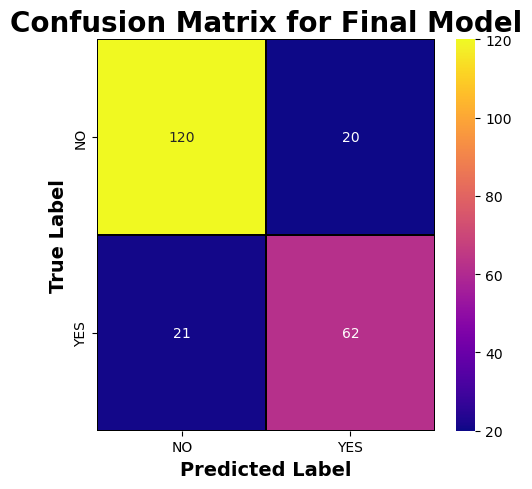

In [80]:
Matrix = confusion_matrix(y_test, y_pred)

x_labels = ["NO","YES"]
y_labels = ["NO","YES"]

fig , ax = plt.subplots(figsize=(5,5))
sns.heatmap(Matrix, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, 
            cmap="plasma", xticklabels = x_labels, yticklabels = y_labels)

plt.xlabel("Predicted Label",fontsize=14,fontweight='bold')
plt.ylabel("True Label",fontsize=14,fontweight='bold')
plt.title('Confusion Matrix for Final Model',fontsize=20,fontweight='bold')
plt.show()

# Predicting the final model

In [81]:
# Prediction
prediction = final.predict(x_test)

In [82]:
Actual = np.array(y_test)
data_pred = pd.DataFrame()
data_pred["Predicted Values"] = prediction
data_pred["Actual Values"] = Actual
data_pred.head()

,Predicted Values,Actual Values
0,1,0
1,0,0
2,1,1
3,0,0
4,0,0


# Saving Model

In [83]:
import joblib
joblib.dump(final,"Titanic_project")

['Titanic_project']